In [28]:
import pandas as pd
from conf import DATASET

In [29]:
table = pd.ExcelFile(DATASET)

In [30]:
df_store = table.parse("store")
df_sales = table.parse("sales")

In [31]:
# Стандартизируем формат номера торговых точек
def format_tt(tt_number):
    if isinstance(tt_number, str):
        return int(tt_number.replace("N", ""))
    return tt_number

In [32]:
df_store["№ ТТ"] = df_store["№ ТТ"].apply(format_tt)

<Axes: xlabel='№ TT'>

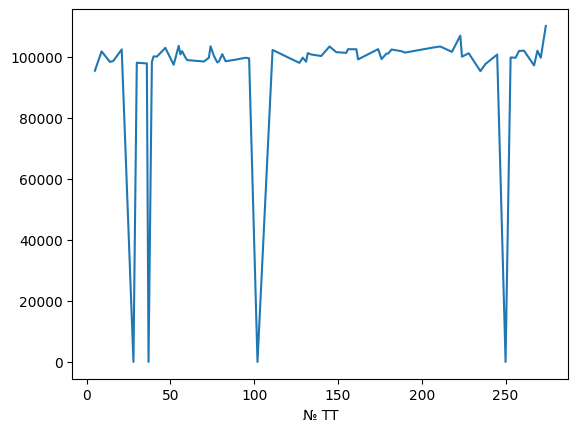

In [33]:
# Отсутствуют реальные данные о продажах на точках
df_sales.groupby("№ TT")['КОЛ-ВО'].mean().plot()

<Axes: xlabel='№ TT'>

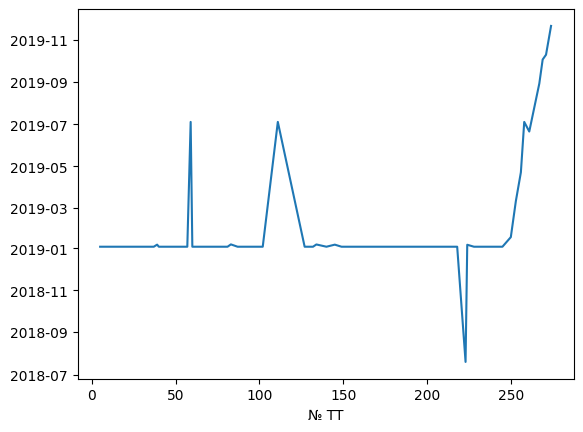

In [34]:
# Не хватает данных за какой-либо период времени
df_sales.groupby("№ TT")['НЕДЕЛЯ'].mean().plot()

РЕГИОН
Волга              Axes(0.125,0.11;0.775x0.77)
Дальний Восток     Axes(0.125,0.11;0.775x0.77)
Москва             Axes(0.125,0.11;0.775x0.77)
Санкт-Петербург    Axes(0.125,0.11;0.775x0.77)
Сибирь             Axes(0.125,0.11;0.775x0.77)
Урал               Axes(0.125,0.11;0.775x0.77)
Центр              Axes(0.125,0.11;0.775x0.77)
Юг                 Axes(0.125,0.11;0.775x0.77)
dtype: object

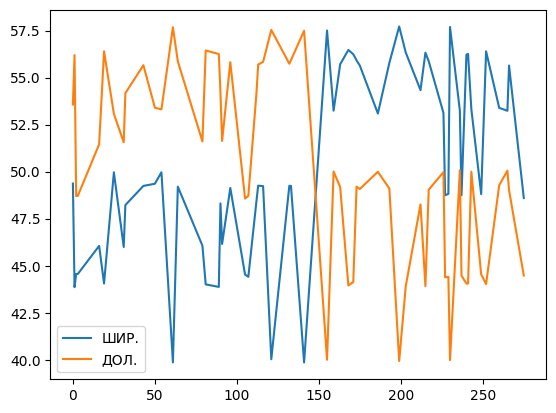

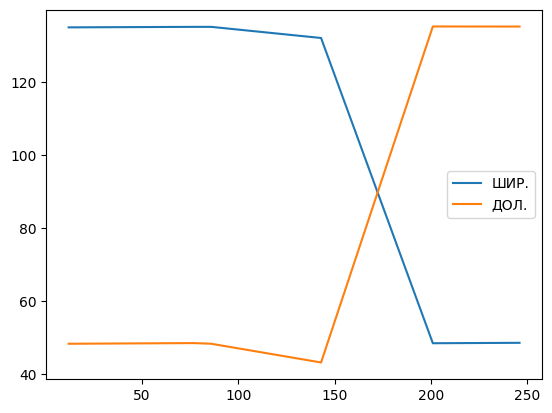

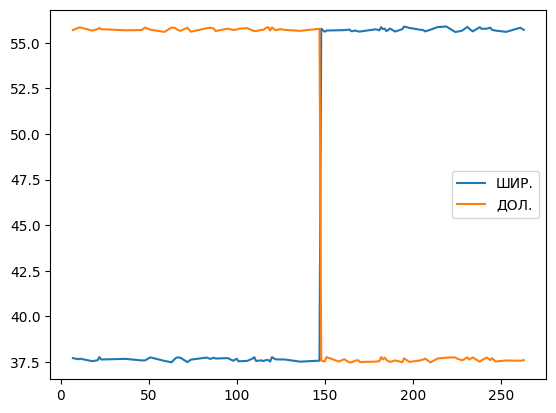

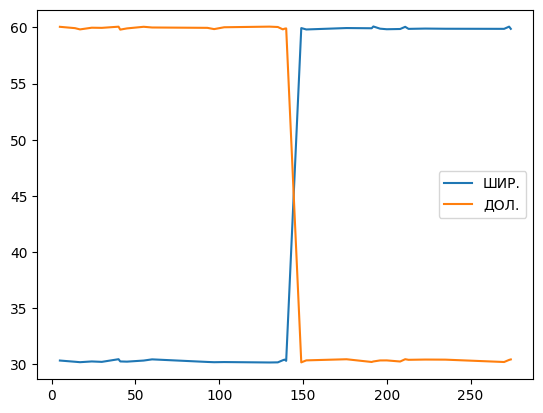

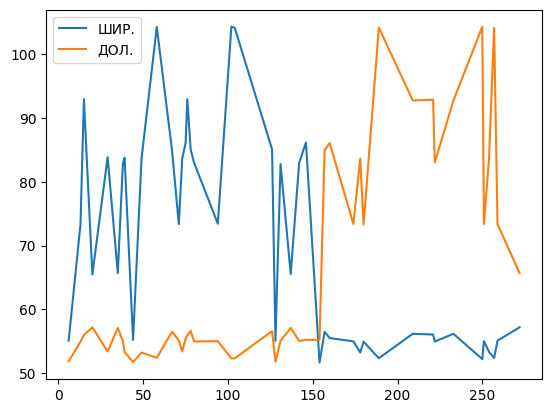

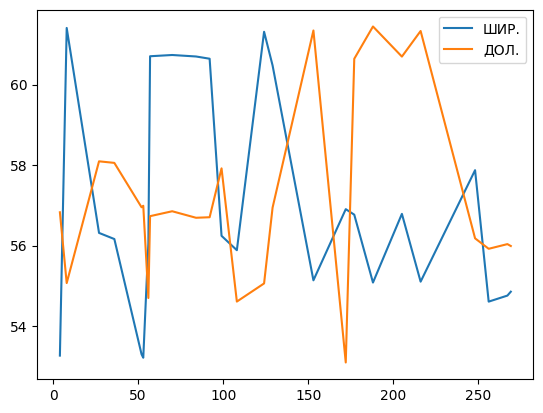

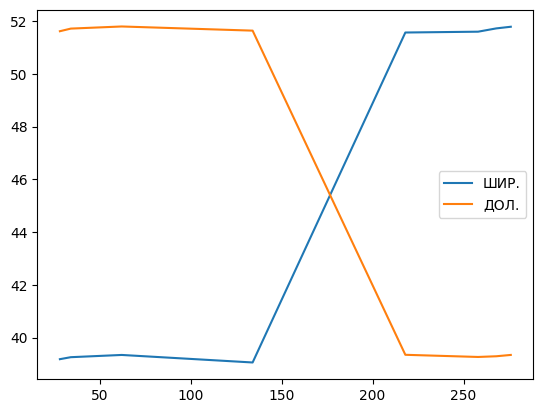

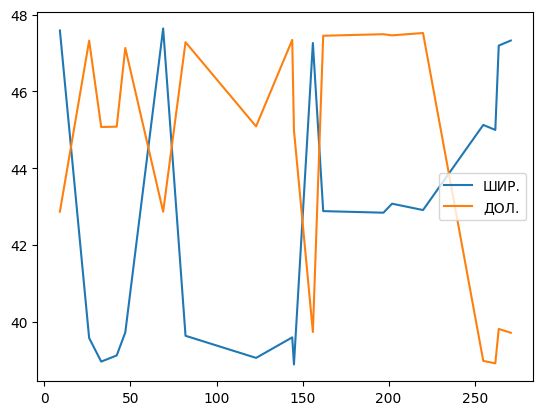

In [35]:
# Координаты перепутаны местами (в центре видно как графики зеркально друг друга повторяют)
# До ТТ 150 координаты перепутамы в Московском, Питерском, Волжском, Центральном, Дальне Восточном регионах
df_store.groupby("РЕГИОН")[['ШИР.', 'ДОЛ.']].plot()

<Axes: >

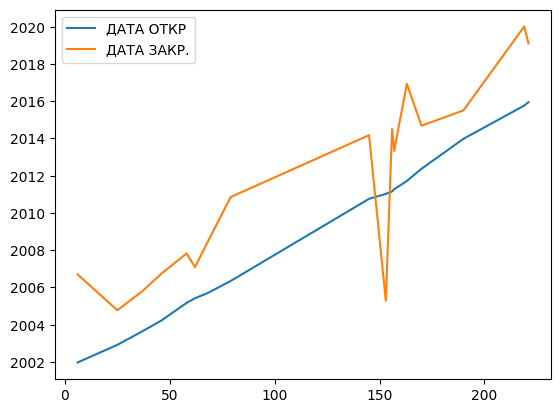

In [36]:
# ТТ 155 закрылась раньше чем открылась
df_store[['ДАТА ОТКР', 'ДАТА ЗАКР.']].dropna().plot()

<Axes: >

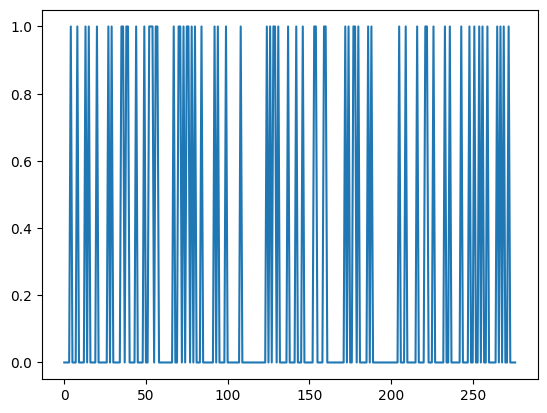

In [37]:
# Нет информации о многих точках в store или sales
df_store.assign(tt_in_sales=df_store["№ ТТ"].isin(df_sales["№ TT"]).astype(int))["tt_in_sales"].plot()